# Read Data & Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read data from spreadsheet
spreadsheet_data = 'https://docs.google.com/spreadsheets/d/1jGCB0PSYMbuw_62oetsRJDy6BeVqRm6qV396N2u4Q2E/edit#gid=1485085913'
data = spreadsheet_data.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(data)
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [ ]:
df.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

In [ ]:
# Change data type
df_cleaned = df.copy()
df_cleaned['Release'] = pd.to_datetime(df_cleaned['Release'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.8+ KB


In [ ]:
df_cleaned.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [ ]:
# Clean the duplicate data
df_cleaned = df_cleaned.drop_duplicates()

In [ ]:
# Typo check
for column in ['Name', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher']:
       print(df_cleaned[column].value_counts(), '\n')

PlayerUnknown's Battlegrounds       1
Dungeon Siege                       1
Cuphead                             1
Danganronpa 2: Goodbye Despair      1
Danganronpa: Trigger Happy Havoc    1
                                   ..
Battlefield 1942                    1
Black & White                       1
Civilization III                    1
Cossacks II: Napoleonic Wars        1
Zoo Tycoon                          1
Name: Name, Length: 175, dtype: int64 

Command & Conquer        5
StarCraft                4
Civilization             4
Age of Empires           4
Warcraft                 3
                        ..
Alice                    1
Ark: Survival Evolved    1
BioShock                 1
Commandos                1
Zoo Tycoon               1
Name: Series, Length: 91, dtype: int64 

2004-03-01    4
2008-09-01    3
2013-03-01    3
2016-02-01    3
2004-11-01    3
             ..
2000-09-01    1
1998-12-01    1
1998-09-01    1
1999-09-01    1
1994-12-01    1
Name: Release, Length: 130, 

In [ ]:
# Fill NaN values in the 'Series' column with 'Non-Series'
df_cleaned['Series'] = df_cleaned['Series'].fillna('Non-Series')

In [ ]:
df_cleaned.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,Non-Series,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Non-Series,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Non-Series,2011-05-01,Action-adventure,Re-Logic,Re-Logic


# Spark SQL & Plotting

In [ ]:
!pip install pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
MsGame = spark.createDataFrame(df_cleaned)
MsGame.show()

+--------------------+-----+--------------------+-------------------+--------------------+--------------------+--------------------+
|                Name|Sales|              Series|            Release|               Genre|           Developer|           Publisher|
+--------------------+-----+--------------------+-------------------+--------------------+--------------------+--------------------+
|PlayerUnknown's B...| 42.0|          Non-Series|2017-12-01 00:00:00|       Battle royale|        PUBG Studios|             Krafton|
|           Minecraft| 33.0|           Minecraft|2011-11-01 00:00:00|   Sandbox, survival|      Mojang Studios|      Mojang Studios|
|          Diablo III| 20.0|              Diablo|2012-05-01 00:00:00| Action role-playing|Blizzard Entertai...|Blizzard Entertai...|
|         Garry's Mod| 20.0|          Non-Series|2006-11-01 00:00:00|             Sandbox|   Facepunch Studios|               Valve|
|            Terraria| 17.2|          Non-Series|2011-05-01 00:00:00|

In [ ]:
MsGame.createOrReplaceTempView("MsGame")

+-------+-------------------+
|   Name|            Release|
+-------+-------------------+
|Valheim|2021-02-01 00:00:00|
|Hydlide|1984-12-01 00:00:00|
+-------+-------------------+



/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


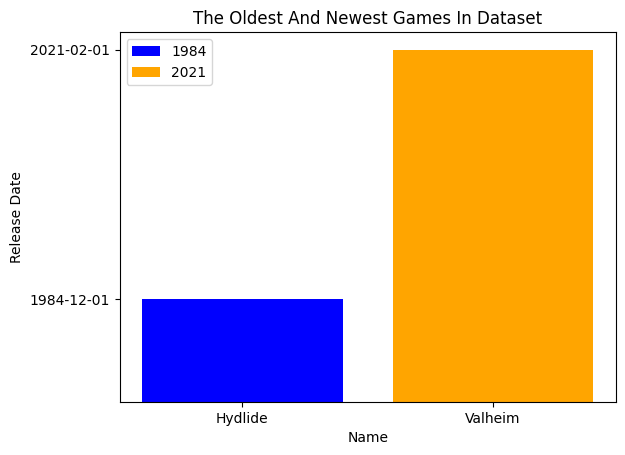

In [ ]:
OldestGames = spark.sql("""
SELECT
  Name, Release
FROM MsGame
WHERE YEAR(Release) = 1984 OR YEAR(Release) = 2021
                   """)

OldestGames.show()

OldestGames = OldestGames.toPandas()
filteredOldestGames = OldestGames.sort_values(by='Release')
colors = ['blue' if year == 1984 else 'orange' for year in filteredOldestGames['Release'].dt.year]

plt.title("The Oldest And Newest Games In Dataset")
bars = plt.bar(filteredOldestGames['Name'], filteredOldestGames['Release'], color = colors)
plt.xlabel('Name')
plt.ylabel('Release Date')
plt.yticks(filteredOldestGames['Release'][filteredOldestGames['Release'].dt.year.isin([1984, 2021])])
plt.legend(bars, ['1984', '2021'])

plt.show()

+--------------------+-------------+
|           Publisher|Total_Publish|
+--------------------+-------------+
|     Electronic Arts|           19|
|Blizzard Entertai...|            8|
| Paradox Interactive|            7|
|          Activision|            6|
|      GT Interactive|            5|
+--------------------+-------------+



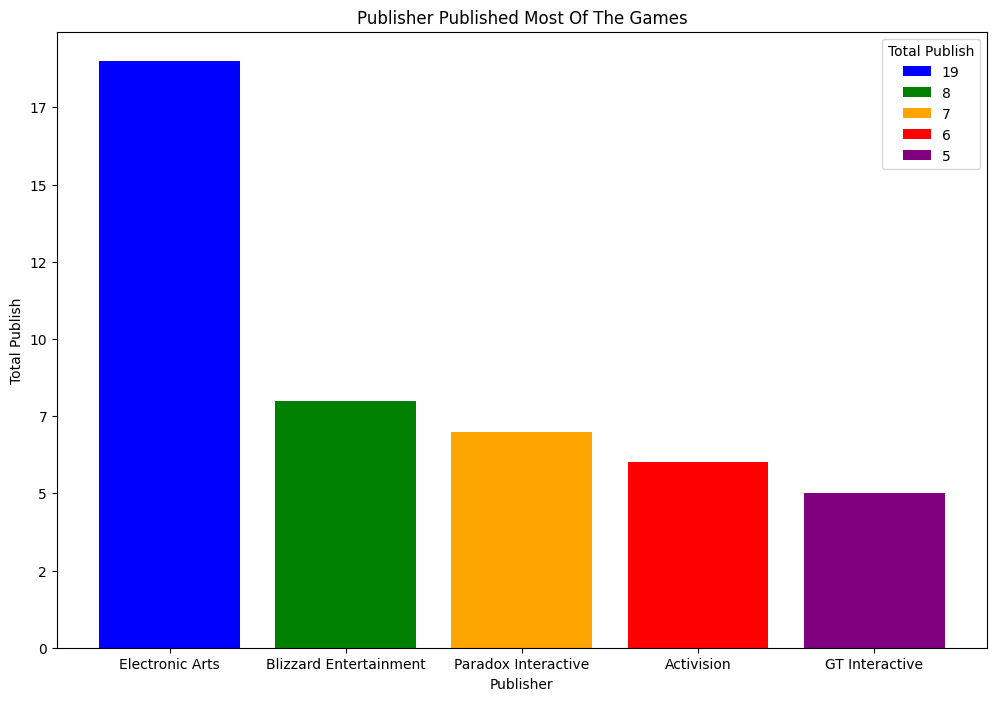

In [ ]:
mostPublishedByPublisher = spark.sql("""
SELECT
  Publisher, COUNT(Publisher) AS Total_Publish
FROM MsGame
GROUP BY Publisher
ORDER BY Total_Publish DESC
LIMIT 5
                   """)

mostPublishedByPublisher.show()

mostPublishedByPublisher = mostPublishedByPublisher.toPandas()
colors = ['blue', 'green', 'orange', 'red', 'purple']
plt.figure(figsize=(12, 8))

plt.title("Publisher Published Most Of The Games")
bars = plt.bar(mostPublishedByPublisher['Publisher'], mostPublishedByPublisher['Total_Publish'], color = colors)
plt.xlabel('Publisher')
plt.ylabel('Total Publish')
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
legend_labels = [str(int(sales)) for sales in mostPublishedByPublisher['Total_Publish']]
plt.legend(bars, legend_labels, title='Total Publish')

plt.show()

+--------------------+-------------+
|           Developer|Total_Develop|
+--------------------+-------------+
|Blizzard Entertai...|            8|
|               Maxis|            6|
|Paradox Developme...|            5|
|         id Software|            4|
|    Westwood Studios|            4|
+--------------------+-------------+



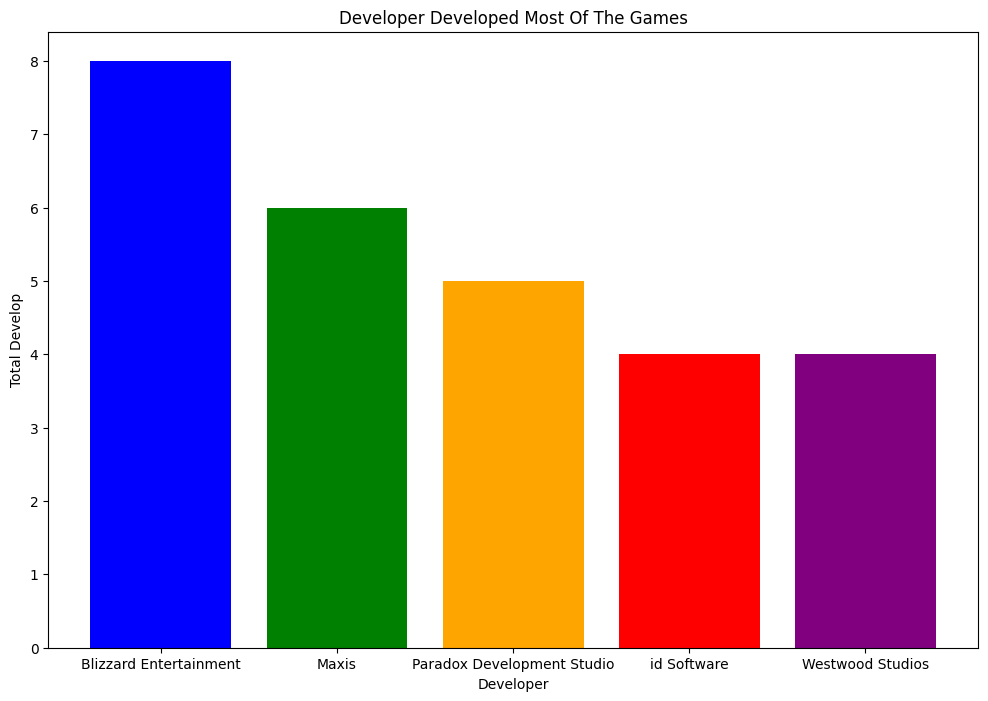

In [ ]:
mostDevelopedByDeveloper = spark.sql("""
SELECT
  Developer, COUNT(Developer) AS Total_Develop
FROM MsGame
GROUP BY Developer
ORDER BY Total_Develop DESC
LIMIT 5
                   """)

mostDevelopedByDeveloper.show()

mostDevelopedByDeveloper = mostDevelopedByDeveloper.toPandas()
colors = ['blue', 'green', 'orange', 'red', 'purple']
plt.figure(figsize=(12, 8))

plt.title("Developer Developed Most Of The Games")
bars = plt.bar(mostDevelopedByDeveloper['Developer'], mostDevelopedByDeveloper['Total_Develop'], color = colors)
plt.xlabel('Developer')
plt.ylabel('Total Develop')

plt.show()

+---------+-----------+
|   Series|Total_Sales|
+---------+-----------+
|Minecraft|       33.0|
|   Diablo|       26.0|
| The Sims|       24.0|
|Half-Life|       21.0|
| Warcraft|       19.0|
+---------+-----------+



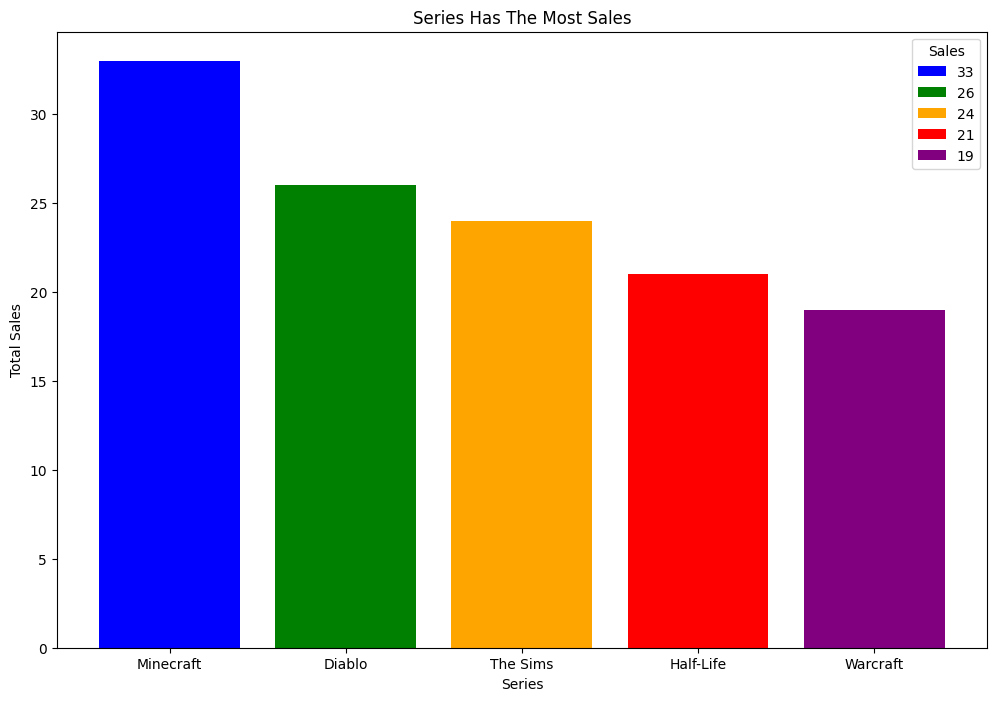

In [ ]:
mostSeriesHasTheMostSales = spark.sql("""
SELECT
  Series, SUM(Sales) AS Total_Sales
FROM MsGame
WHERE Series != 'Non-Series'
GROUP BY Series
ORDER BY Total_Sales DESC
LIMIT 5
                   """)

mostSeriesHasTheMostSales.show()

mostSeriesHasTheMostSales = mostSeriesHasTheMostSales.toPandas()
colors = ['blue', 'green', 'orange', 'red', 'purple']
plt.figure(figsize=(12, 8))

plt.title("Series Has The Most Sales")
bars = plt.bar(mostSeriesHasTheMostSales['Series'], mostSeriesHasTheMostSales['Total_Sales'], color = colors)
plt.xlabel('Series')
plt.ylabel('Total Sales')
legend_labels = [str(int(sales)) for sales in mostSeriesHasTheMostSales['Total_Sales']]
plt.legend(bars, legend_labels, title='Sales')

plt.show()

+-----------------+-----------+
|           Series|Total_Games|
+-----------------+-----------+
|Command & Conquer|          5|
|   Age of Empires|          4|
|     Civilization|          4|
|        StarCraft|          4|
|      The Witcher|          3|
+-----------------+-----------+



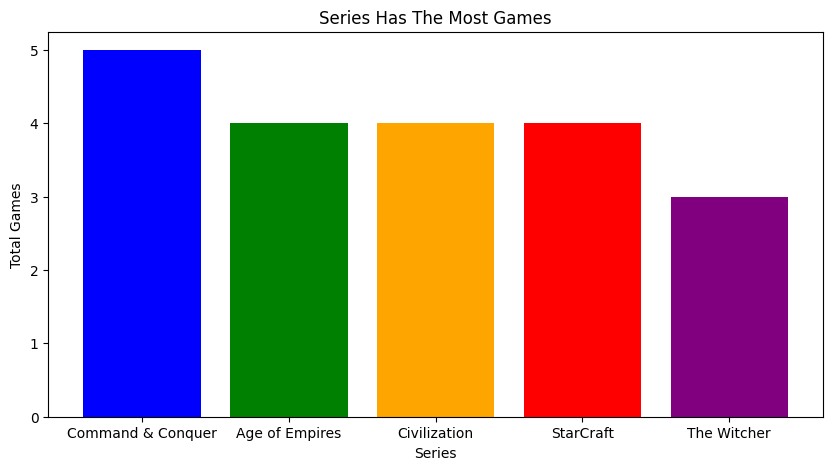

In [ ]:
mostSeriesHasTheMostGames = spark.sql("""
SELECT
  Series, COUNT(Name) AS Total_Games
FROM MsGame
WHERE Series != 'Non-Series'
GROUP BY Series
ORDER BY Total_Games DESC
LIMIT 5
                   """)

mostSeriesHasTheMostGames.show()

mostSeriesHasTheMostGames = mostSeriesHasTheMostGames.toPandas()
colors = ['blue', 'green', 'orange', 'red', 'purple']
plt.figure(figsize=(10, 5))

plt.title("Series Has The Most Games")
bars = plt.bar(mostSeriesHasTheMostGames['Series'], mostSeriesHasTheMostGames['Total_Games'], color = colors)
plt.xlabel('Series')
plt.ylabel('Total Games')

plt.show()